<a href="https://colab.research.google.com/github/lolobq/ECGR-4127-Machine_Learning_for_IoT/blob/main/Homework4/IoTHomework4Analytical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Portion of Homework

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of true positives: 26 

Number of false positives: 3 

Number of true negatives: 150 

Number of false negatives: 21 

Precision: 0.896551724137931 

Recall: 0.5531914893617021 



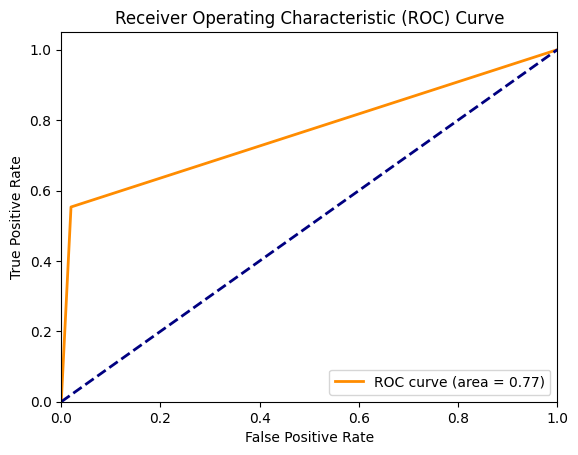


Minimum False Positive Rate to achieve at least 90% recall: 1.0


In [13]:
# Read in the data and extract columns into numpy arrays
file_path = '/content/drive/My Drive/ML/hw4_data.csv'
df = pd.DataFrame(pd.read_csv(file_path))

model_output = df['model_output'].to_numpy()
true_class = df['true_class'].to_numpy()
y_pred = df['prediction'].to_numpy()

true_pos = df[(df['prediction'] == 1) & (df['true_class'] == 1)].shape[0]
false_pos = df[(df['prediction'] == 1) & (df['true_class'] == 0)].shape[0]
true_neg = df[(df['prediction'] == 0) & (df['true_class'] == 0)].shape[0]
false_neg = df[(df['prediction'] == 0) & (df['true_class'] == 1)].shape[0]

print("Number of true positives:", true_pos, "\n")
print("Number of false positives:", false_pos, "\n")
print("Number of true negatives:", true_neg, "\n")
print("Number of false negatives:", false_neg, "\n")

precision = true_pos/float(true_pos+false_pos)
recall = true_pos/float(true_pos+false_neg)
print("Precision:", precision, "\n")
print("Recall:", recall, "\n")

# Compute the True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, thresholds = roc_curve(true_class, y_pred)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Find the index where TPR is closest to 0.9 (or greater)
index = np.argmax(tpr >= 0.9)

# Get the corresponding False Positive Rate (FPR) at that threshold
min_fpr = fpr[index]

print("\nMinimum False Positive Rate to achieve at least 90% recall:", min_fpr)